In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Importing and cleaning data

In [46]:
df = pd.read_csv("./datasets/Motor_Vehicle_Crashes.csv")

years_filter = [2022, 2023]
df = df[df['Year'].isin(years_filter)]

# these are the features we want to use, drop cols where these features are None
features = ['Time', 'Lighting Conditions', 'Weather Conditions', 'Road Surface Conditions', 'Road Descriptor']
df = df.dropna(subset=features, how='any')

# take a random sample of the whole data set
df = df.sample(n=100_000)

# convert 'Time' to datetime and calculate the minute of the day (0 to 3600)
df['Minute of Day'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Time'], format='%H:%M').dt.minute

df['Hour of Day'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# 1 if it is an injury or fatal accident, otherwise 0
df['Injury or Fatal Accident'] = df['Crash Descriptor'].apply(lambda x: 1 if x in ['Injury Accident', 'Fatal Accident', 'Property Damage & Injury Accident'] else 0)

df.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,...,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved,Minute of Day,Hour of Day,Injury or Fatal Accident
1161765,2022,Property Damage & Injury Accident,16:08,01/22/2022,Saturday,Y,Daylight,OYSTER BAY,REAR END,NASSAU,...,Clear,Traffic Signal,Dry,27 03041163,Not Applicable,"Other Motor Vehicle, Collision With",2,968,16,1
1299684,2022,Injury Accident,22:10,06/07/2022,Tuesday,Y,Dark-Road Lighted,KINGS,OTHER,KINGS,...,Rain,Traffic Signal,Wet,NaN,"Crossing, With Signal","Pedestrian, Collision With",1,1330,22,1
1337247,2022,Property Damage Accident,11:02,07/17/2022,Sunday,Y,Daylight,NEW YORK,OVERTAKING,NEW YORK,...,Clear,Traffic Signal,Dry,907DX5M23056,Not Applicable,"Other Motor Vehicle, Collision With",2,662,11,0
1430347,2022,Property Damage Accident,8:42,08/15/2022,Monday,Y,Daylight,WARWICK,OTHER,ORANGE,...,Clear,No Passing Zone,Dry,17A83011077,Not Applicable,Deer,1,522,8,0
1670783,2023,Property Damage Accident,21:05,05/23/2023,Tuesday,Y,Dark-Road Lighted,ANNSVILLE,OTHER,ONEIDA,...,Cloudy,No Passing Zone,Dry,NaN,Not Applicable,Deer,1,1265,21,0


In [47]:
df.shape

(100000, 21)

# Graphs of data

Text(0.5, 1.0, 'Frequency of Car Crashes by Hour of Day')

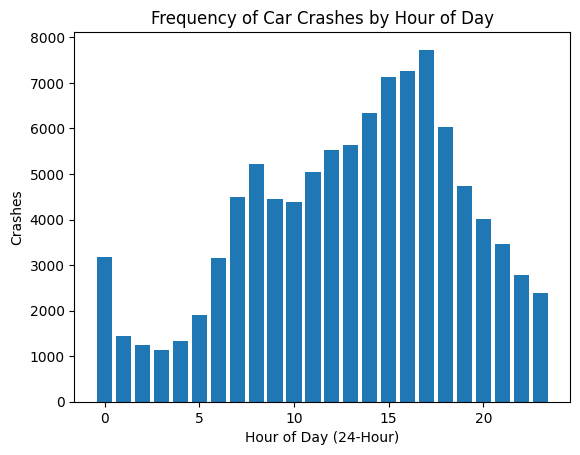

In [48]:
filtered = df["Hour of Day"].value_counts().sort_index()

road_desc = filtered.index.tolist()
frequency = filtered.values.tolist()

plt.bar(road_desc, frequency)
plt.xlabel("Hour of Day (24-Hour)")
plt.ylabel("Crashes")
plt.title("Frequency of Car Crashes by Hour of Day")

Text(0.5, 1.0, 'Frequency of Car Crashes by Weather')

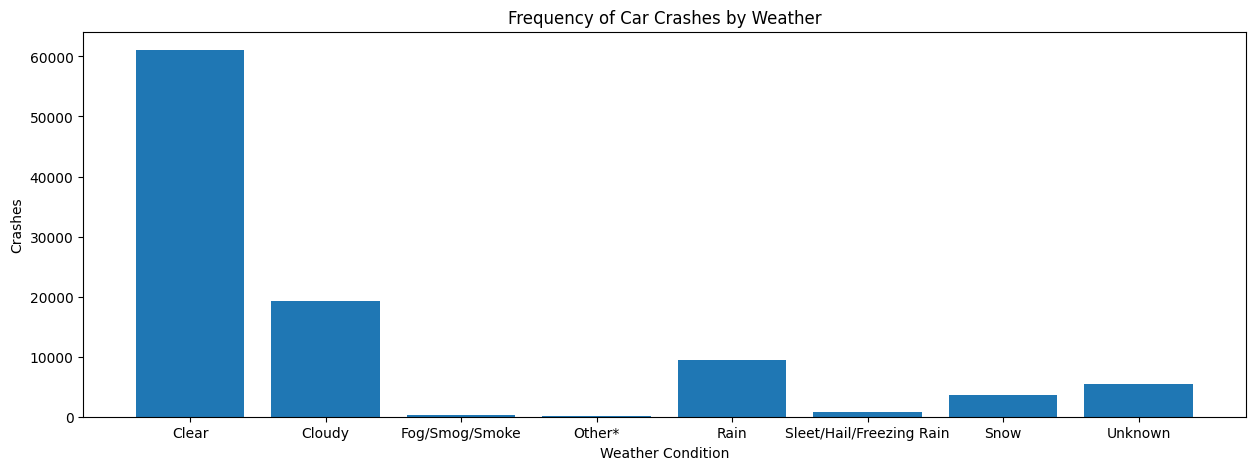

In [49]:
filtered = df["Weather Conditions"].value_counts().sort_index()

road_desc = filtered.index.tolist()
frequency = filtered.values.tolist()

plt.figure(figsize=(15, 5))
plt.bar(road_desc, frequency)
plt.xlabel("Weather Condition")
plt.ylabel("Crashes")
plt.title("Frequency of Car Crashes by Weather")

Text(0.5, 1.0, 'Frequency of Car Crashes by Road Type')

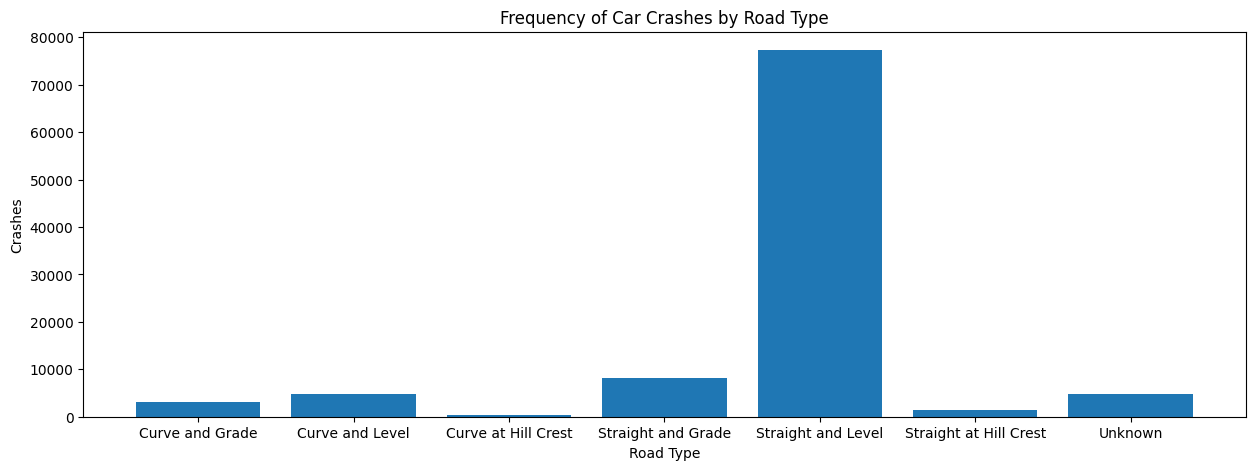

In [50]:
filtered = df["Road Descriptor"].value_counts().sort_index()

road_desc = filtered.index.tolist()
frequency = filtered.values.tolist()

plt.figure(figsize=(15, 5))
plt.bar(road_desc, frequency)
plt.xlabel("Road Type")
plt.ylabel("Crashes")
plt.title("Frequency of Car Crashes by Road Type")

Text(0.5, 1.0, 'Frequency of Car Crashes by Road Condition')

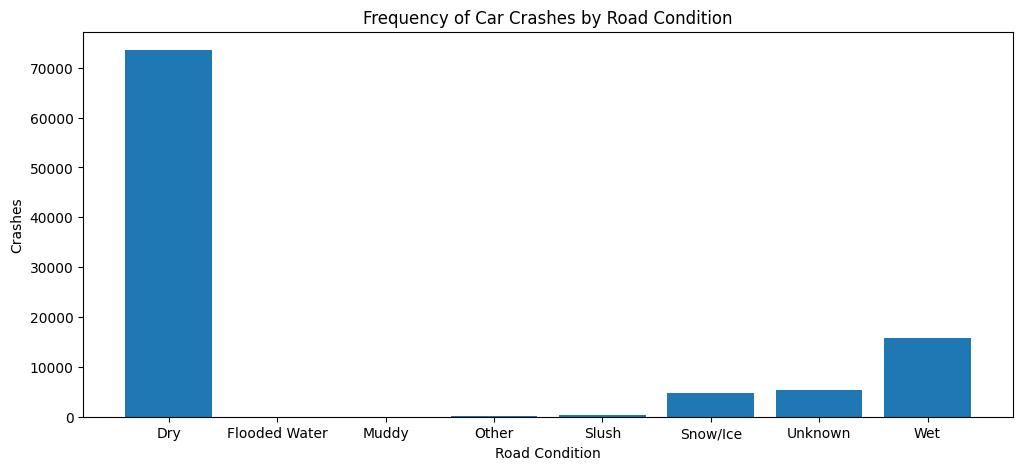

In [51]:
filtered = df["Road Surface Conditions"].value_counts().sort_index()

road_desc = filtered.index.tolist()
frequency = filtered.values.tolist()

plt.figure(figsize=(12, 5))
plt.bar(road_desc, frequency)
plt.xlabel("Road Condition")
plt.ylabel("Crashes")
plt.title("Frequency of Car Crashes by Road Condition")

In [52]:
features[0] = 'Minute of Day'

X = df[features]
y = df['Injury or Fatal Accident']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (70000, 5)
y_train shape: (70000,)
X_test shape: (30000, 5)
y_test shape: (30000,)


# for outputting

In [55]:
def print_stats(y_hat, y_test, model_description=""):
    print(f"Model: {model_description}")
    acc = np.mean(y_hat == y_test)
    print(f'accuracy: {acc}')
    print()

    print('test data counts')
    print(f'no injury: {sum(y_test == 0)}, injury: {sum(y_test == 1)}')
    print('predicted data counts')
    print(f'no injury: {sum(y_hat == 0)}, injury: {sum(y_hat == 1)}')
    print()

    correct_guesses = np.sum(y_hat == y_test)
    false_negatives = np.sum((y_hat == 0) & (y_test == 1))
    false_positives = np.sum((y_hat == 1) & (y_test == 0))
    true_negatives = np.sum((y_hat == 0) & (y_test == 0))
    true_positives = np.sum((y_hat == 1) & (y_test == 1))

    # calculate percentages
    false_negatives_percent = (false_negatives / (true_positives + false_negatives)) * 100
    false_positives_percent = (false_positives / (true_negatives + false_positives)) * 100
    true_negatives_percent = (true_negatives / (true_negatives + false_positives)) * 100
    true_positives_percent = (true_positives / (true_positives + false_negatives)) * 100

    # out of all predicted injuries, how many are actually injuries
    precision = true_positives / (true_positives + false_positives) * 100

    # out of all actual injuries, how many did the model correcly predict
    recall = true_positives / (true_positives + false_negatives) * 100

    # print(f"Correct guesses: {correct_guesses} ({correct_guesses_percent:.2f}%)")
    print(f"False negatives: {false_negatives} ({false_negatives_percent:.2f}%)")
    print(f"False positives: {false_positives} ({false_positives_percent:.2f}%)")
    print(f"True negatives: {true_negatives} ({true_negatives_percent:.2f}%)")
    print(f"True positives: {true_positives} ({true_positives_percent:.2f}%)")

    print(f"Out of all predicted injuries, how many are actually injuries: {precision:.2f}%")
    print(f"Out of all actual injuries, how many did the model correctly predict: {recall:.2f}%")

# Logisitic

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

numeric_features = [features[0]]
categorical_features = features[1:]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

In [57]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Lighting Conditions',
                                                   'Weather Conditions',
                                                   'Road Surface Conditions',
                                                   'Road Descriptor']),
                                                 ('num', 'passthrough',
                                                  ['Minute of Day'])])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [58]:
y_hat = model.predict(X_test)

In [59]:
print_stats(y_hat, y_test, "Logisitic")

Model: Logisitic
accuracy: 0.7105333333333334

test data counts
no injury: 21321, injury: 8679
predicted data counts
no injury: 29991, injury: 9

False negatives: 8677 (99.98%)
False positives: 7 (0.03%)
True negatives: 21314 (99.97%)
True positives: 2 (0.02%)
Out of all predicted injuries, how many are actually injuries: 22.22%
Out of all actual injuries, how many did the model correctly predict: 0.02%


# Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Lighting Conditions',
                                                   'Weather Conditions',
                                                   'Road Surface Conditions',
                                                   'Road Descriptor']),
                                                 ('num', 'passthrough',
                                                  ['Minute of Day'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [62]:
y_hat = model.predict(X_test)

In [63]:
print_stats(y_hat, y_test, "Random forest")

Model: Random forest
accuracy: 0.6618666666666667

test data counts
no injury: 21321, injury: 8679
predicted data counts
no injury: 25585, injury: 4415

False negatives: 7204 (83.00%)
False positives: 2940 (13.79%)
True negatives: 18381 (86.21%)
True positives: 1475 (17.00%)
Out of all predicted injuries, how many are actually injuries: 33.41%
Out of all actual injuries, how many did the model correctly predict: 17.00%
